In [2]:
import pandas as pd
import numpy as np

from pycaret.classification import *

from sklearn.metrics import log_loss, f1_score

In [3]:
base_train = catalog.load("base_train")
base_train

[04/16/23 01:31:52] INFO     Loading data from 'base_train' (ParquetDataSet)...                 ]8;id=221606;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=872838;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
3003,33.9913,-118.2628,8,3,0,5,0.0
10864,34.0443,-118.2698,7,1,0,0,1.0
26953,33.9873,-118.2118,0,1,1,8,1.0
7666,34.0673,-118.1298,5,4,0,14,0.0
19438,34.0353,-118.3078,6,4,0,3,0.0
...,...,...,...,...,...,...,...
26879,34.0443,-118.2698,5,2,1,0,0.0
30312,34.0473,-118.3888,8,2,1,11,0.0
14520,33.9183,-118.2658,8,3,0,12,0.0
5572,33.9443,-118.1628,4,3,0,14,0.0


In [4]:
base_test = catalog.load("base_test")
base_test

[04/16/23 01:31:55] INFO     Loading data from 'base_test' (ParquetDataSet)...                  ]8;id=888045;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=148955;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
24049,34.0443,-118.2708,0,3,0,0,1.0
18696,34.0503,-118.1078,10,1,0,16,0.0
25540,33.9083,-118.3638,1,3,0,16,0.0
11478,34.0443,-118.2698,0,2,0,0,0.0
9909,33.8943,-118.2028,6,1,0,16,1.0
...,...,...,...,...,...,...,...
13744,33.9123,-118.1318,10,1,0,19,1.0
6651,33.9763,-118.2718,11,3,0,6,0.0
26858,33.9723,-118.1788,3,3,1,11,0.0
12251,34.0443,-118.2698,8,2,0,0,0.0


## Treinamento_RegLog

In [5]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 777)
setup_de_classificacao.add_metric('logloss','Log Loss', log_loss, greater_is_better=False)

,Description,Value
0,Session id,777
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


Name                                                       Log Loss
Display Name                                               Log Loss
Score Function            <function log_loss at 0x000001F65A2459D0>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [6]:
lr_model = setup_de_classificacao.create_model('lr' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.5854,0.6070,0.4760,0.5798,0.5228,0.1625,0.1649,6.6099
1,0.5933,0.5977,0.5221,0.5823,0.5506,0.1812,0.1821,6.4836
2,0.5669,0.6078,0.4631,0.5553,0.5050,0.1256,0.1273,6.9046
3,0.5731,0.5956,0.4852,0.5608,0.5203,0.1393,0.1404,6.8064
4,0.5766,0.6002,0.4723,0.5676,0.5156,0.1451,0.1470,6.7503
5,0.5704,0.5829,0.4834,0.5574,0.5178,0.1340,0.1351,6.8485
6,0.6144,0.6297,0.5295,0.6106,0.5672,0.2227,0.2246,6.1468
7,0.5863,0.6046,0.4880,0.5799,0.5300,0.1654,0.1673,6.5959
8,0.5731,0.5912,0.4899,0.5612,0.5231,0.1399,0.1409,6.8064


In [7]:
type(lr_model)

sklearn.linear_model._logistic.LogisticRegression

In [8]:
lr_model_results = setup_de_classificacao.pull()
lr_model_results

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
Fold,,,,,,,,
0,0.5854,0.6070,0.4760,0.5798,0.5228,0.1625,0.1649,6.6099
1,0.5933,0.5977,0.5221,0.5823,0.5506,0.1812,0.1821,6.4836
2,0.5669,0.6078,0.4631,0.5553,0.5050,0.1256,0.1273,6.9046
3,0.5731,0.5956,0.4852,0.5608,0.5203,0.1393,0.1404,6.8064
4,0.5766,0.6002,0.4723,0.5676,0.5156,0.1451,0.1470,6.7503
5,0.5704,0.5829,0.4834,0.5574,0.5178,0.1340,0.1351,6.8485
6,0.6144,0.6297,0.5295,0.6106,0.5672,0.2227,0.2246,6.1468
7,0.5863,0.6046,0.4880,0.5799,0.5300,0.1654,0.1673,6.5959
8,0.5731,0.5912,0.4899,0.5612,0.5231,0.1399,0.1409,6.8064


In [9]:
pred_lr = predict_model(lr_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,Logistic Regression,0.5746,0.5994,0.4879,0.5628,0.5227,0.1425,0.1436,6.7825


In [10]:
pred_lr

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
24049,34.044300,-118.270798,0,3,0,0,1.0,1,0.5881
18696,34.050301,-118.107803,10,1,0,16,0.0,0,0.6200
25540,33.908298,-118.363800,1,3,0,16,0.0,0,0.5778
11478,34.044300,-118.269798,0,2,0,0,0.0,1,0.5939
9909,33.894299,-118.202797,6,1,0,16,1.0,0,0.5691
...,...,...,...,...,...,...,...,...,...
13744,33.912300,-118.131798,10,1,0,19,1.0,0,0.6155
6651,33.976299,-118.271797,11,3,0,6,0.0,1,0.5437
26858,33.972301,-118.178802,3,3,1,11,0.0,0,0.5498
12251,34.044300,-118.269798,8,2,0,0,0.0,1,0.6049


In [11]:
f1 = f1_score(pred_lr[['shot_made_flag']], pred_lr[['prediction_label']])
f1

0.5226769911504424

In [12]:
lg = log_loss(pred_lr[['shot_made_flag']], pred_lr[['prediction_label']])
lg

15.334322344002022

## Treinamento_Clf

In [13]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 777 )
setup_de_classificacao.add_metric('logloss','Log Loss', log_loss, greater_is_better=False)

,Description,Value
0,Session id,777
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


Name                                                       Log Loss
Display Name                                               Log Loss
Score Function            <function log_loss at 0x000001F65A2459D0>
Scorer               make_scorer(log_loss, greater_is_better=False)
Target                                                         pred
Args                                                             {}
Greater is Better                                             False
Multiclass                                                     True
Custom                                                         True
Name: logloss, dtype: object

In [16]:
melhores_modelos = compare_models(n_select=5, sort='Log Loss')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss,TT (Sec)
ada,Ada Boost Classifier,0.5898,0.6001,0.3799,0.6139,0.4687,0.1642,0.1769,6.5389,1.1130
gbc,Gradient Boosting Classifier,0.5877,0.5982,0.3906,0.6058,0.4747,0.1608,0.1714,6.5726,1.1190
lr,Logistic Regression,0.5812,0.6018,0.4906,0.5714,0.5278,0.1555,0.1570,6.6765,0.8450
ridge,Ridge Classifier,0.5801,0.0000,0.4930,0.5694,0.5283,0.1535,0.1548,6.6947,1.1390
lda,Linear Discriminant Analysis,0.5800,0.6027,0.4935,0.5692,0.5286,0.1533,0.1546,6.6961,1.0880
nb,Naive Bayes,0.5796,0.5974,0.5116,0.5661,0.5374,0.1540,0.1547,6.7017,1.0000
qda,Quadratic Discriminant Analysis,0.5773,0.6021,0.5360,0.5598,0.5475,0.1514,0.1515,6.7382,0.9080
lightgbm,Light Gradient Boosting Machine,0.5743,0.5900,0.4812,0.5634,0.5189,0.1415,0.1430,6.7859,1.1760
rf,Random Forest Classifier,0.5666,0.5818,0.5295,0.5479,0.5383,0.1302,0.1304,6.9095,1.2380
et,Extra Trees Classifier,0.5628,0.5762,0.5463,0.5420,0.5438,0.1242,0.1243,6.9698,1.3370


In [17]:
melhores_modelos

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=777),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=777, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto'

In [18]:
ada_clf_model = melhores_modelos[0]
ada_clf_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=777)

In [19]:
type(ada_clf_model)

sklearn.ensemble._weight_boosting.AdaBoostClassifier

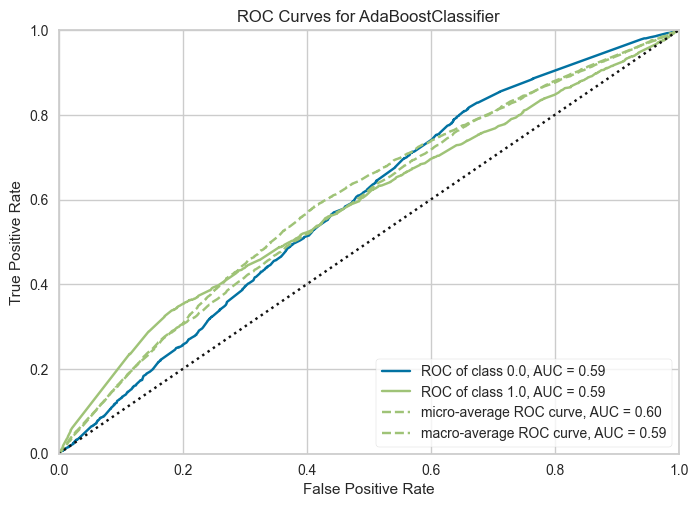

In [20]:
plot_model(ada_clf_model)

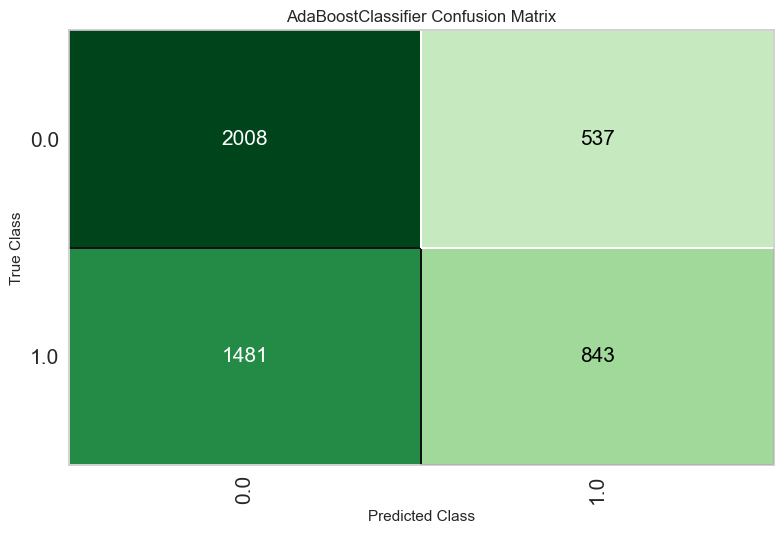

In [21]:
plot_model(ada_clf_model, plot='confusion_matrix')

In [22]:
pred_ada_clf = predict_model(ada_clf_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,str,0.5985,0.6103,0.3820,0.6314,0.4760,0.1814,0.1964,6.4013


In [23]:
pred_ada_clf

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
24049,34.044300,-118.270798,0,3,0,0,1.0,1,0.5027
18696,34.050301,-118.107803,10,1,0,16,0.0,0,0.5029
25540,33.908298,-118.363800,1,3,0,16,0.0,0,0.5017
11478,34.044300,-118.269798,0,2,0,0,0.0,1,0.5025
9909,33.894299,-118.202797,6,1,0,16,1.0,0,0.5009
...,...,...,...,...,...,...,...,...,...
13744,33.912300,-118.131798,10,1,0,19,1.0,0,0.5018
6651,33.976299,-118.271797,11,3,0,6,0.0,0,0.5003
26858,33.972301,-118.178802,3,3,1,11,0.0,0,0.5011
12251,34.044300,-118.269798,8,2,0,0,0.0,1,0.5030


In [24]:
f1 = f1_score(pred_ada_clf[['shot_made_flag']], pred_ada_clf[['prediction_label']])
f1

0.4760373110324863

In [25]:
lg = log_loss(pred_ada_clf[['shot_made_flag']], pred_ada_clf[['prediction_label']])
lg

14.47254408944339

### Inferência com o classificador

In [26]:
base_inference = catalog.load("base_inference")

[04/16/23 01:40:05] INFO     Loading data from 'base_inference' (CSVDataSet)...                 ]8;id=119731;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=223812;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [27]:
pred_inference_ada_clf = predict_model(ada_clf_model, base_inference)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Log Loss
0,str,0.4359,0.4859,0.6594,0.3245,0.4349,-0.0114,-0.0144,8.9934


In [28]:
pred_inference_ada_clf

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
0,33.806301,-118.363800,1,3,0,25,0.0,1,0.6324
1,33.818298,-118.386803,8,2,0,25,1.0,1,0.5441
2,33.858299,-118.452797,0,3,0,26,0.0,1,0.5442
3,33.772301,-118.296799,0,2,0,27,1.0,1,0.6327
4,33.850300,-118.424797,2,1,0,24,0.0,0,0.5023
...,...,...,...,...,...,...,...,...,...
5407,33.828300,-118.403801,2,1,1,25,0.0,1,0.5446
5408,33.783298,-118.287804,0,2,1,26,1.0,1,0.6327
5409,33.794300,-118.188797,7,3,1,26,0.0,1,0.6328
5410,33.365299,-118.281799,0,3,1,67,0.0,0,0.5437


In [29]:
pred_inference_ada_clf.query('prediction_label == 1')

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
0,33.806301,-118.363800,1,3,0,25,0.0,1,0.6324
1,33.818298,-118.386803,8,2,0,25,1.0,1,0.5441
2,33.858299,-118.452797,0,3,0,26,0.0,1,0.5442
3,33.772301,-118.296799,0,2,0,27,1.0,1,0.6327
7,33.787300,-118.262802,3,1,0,25,1.0,1,0.6334
...,...,...,...,...,...,...,...,...,...
5405,33.794300,-118.229797,9,4,1,25,0.0,1,0.6329
5407,33.828300,-118.403801,2,1,1,25,0.0,1,0.5446
5408,33.783298,-118.287804,0,2,1,26,1.0,1,0.6327
5409,33.794300,-118.188797,7,3,1,26,0.0,1,0.6328


In [30]:
f1 = f1_score(pred_inference_ada_clf[['shot_made_flag']], pred_inference_ada_clf[['prediction_label']])
f1

0.43494354987969647

In [31]:
lg = log_loss(pred_inference_ada_clf[['shot_made_flag']], pred_inference_ada_clf[['prediction_label']])
lg

20.332829600327912